In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
#Step 2: Generate the dataset/ import dataset
data = pd.read_csv(r'C:\Users\Sahil Kumar\Desktop\Recommendation\user_personalized_features.csv')
# Remove unnecessary columns
data.drop(['Unnamed: 0', ], axis=1, inplace=True)
data.head(10)#sample of 10

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True
5,#6,38,Male,Suburban,25926,Travel,22,8,25,2669,Books,520,28,False
6,#7,56,Male,Urban,124555,Fashion,11,7,152,1113,Home & Kitchen,330,31,True
7,#8,36,Male,Urban,29496,Technology,26,7,108,2151,Apparel,558,19,True
8,#9,40,Male,Rural,76447,Travel,25,6,130,4085,Books,325,3,True
9,#10,28,Male,Urban,121604,Food,13,8,61,4999,Electronics,114,36,False


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 3: Data Cleaning
# Ensure numeric columns are converted to numeric and handle invalid entries
numeric_columns = [
    'Age', 'Income', 'Last_Login_Days_Ago', 'Purchase_Frequency',
    'Average_Order_Value', 'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed'
]

for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric

# Fill NaN values with 0
data.fillna(0, inplace=True)

# Handle categorical columns with Label Encoding
categorical_columns = ['Gender', 'Location', 'Interests', 'Newsletter_Subscription']

for col in categorical_columns:
    if col in data.columns:
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col].astype(str))  # Convert to string first


In [7]:
# Step 3.1: Add new features
np.random.seed(42)  # For reproducibility
data['visitor'] = np.random.choice(['New', 'Returning'], size=len(data))  # Categorical: Visitor type
data['bought_count'] = np.random.randint(0, 20, size=len(data))
data['purchased'] = np.where(data['bought_count'] > 5, 1, 0)  # Binary flag: Purchased or not  # Random count of items purchased

# Encode 'visitor' as categorical
data['visitor'] = LabelEncoder().fit_transform(data['visitor'])


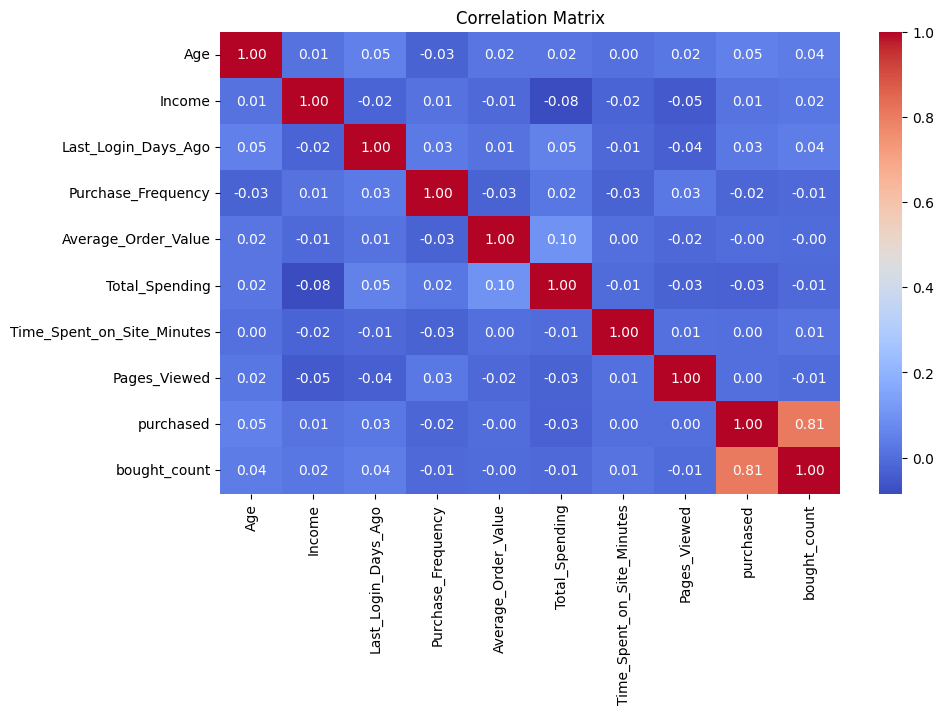

In [8]:
# Step 3.2: Correlation Matrix
correlation_matrix = data[numeric_columns + ['purchased', 'bought_count']].corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Axes: title={'center': 'Age vs Total Spending'}, xlabel='Age', ylabel='Total_Spending'>

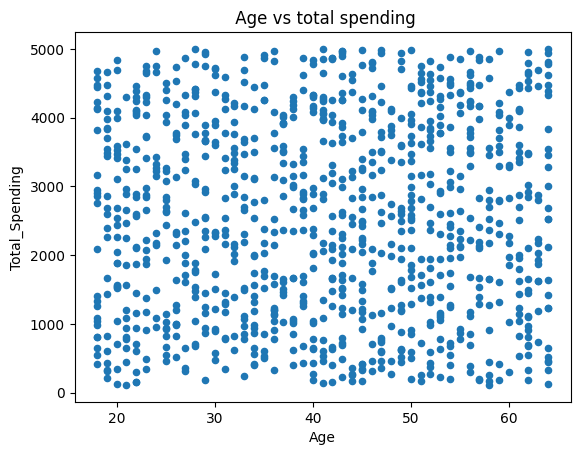

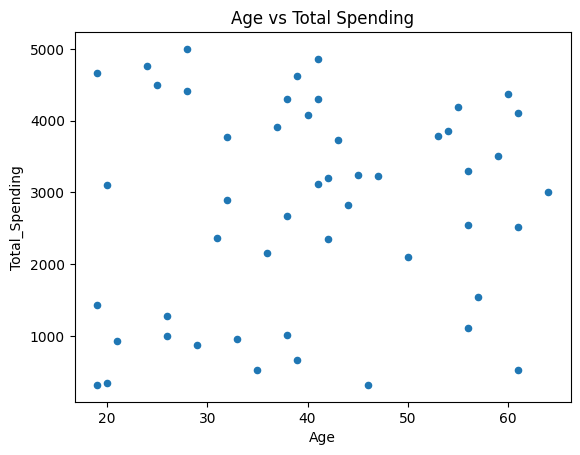

In [9]:
#Step 3.3 : Visualize the data
#total amount of data
data.plot (x = 'Age', y='Total_Spending', kind='scatter', title=' Age vs total spending')

# Limit the data to the first 50 rows using head()
data.head(50).plot(x='Age', y='Total_Spending', kind='scatter', title='Age vs Total Spending')

In [10]:
# Step 4: Define features and target for Logistic Regression
features = [
    'Age', 'Income', 'Total_Spending', 'Pages_Viewed', 'Gender', 'Location',
    'Interests', 'Newsletter_Subscription', 'Time_Spent_on_Site_Minutes',
    'Purchase_Frequency', 'Average_Order_Value', 'visitor', 'bought_count'
]
X = data[features]
y = data['purchased']  # Target is now 'purchased'

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

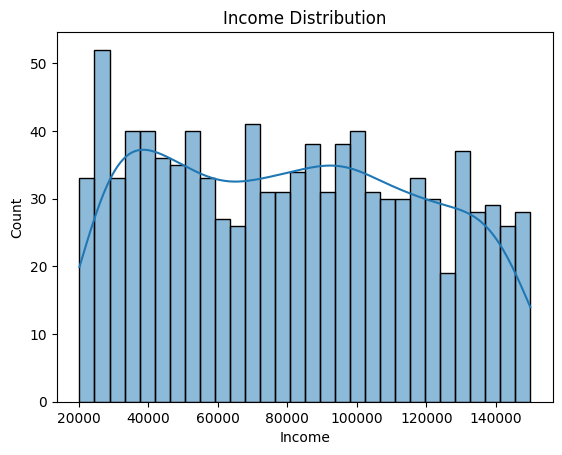

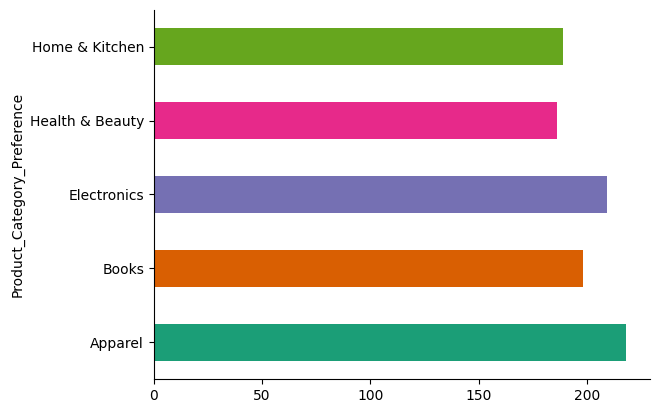

In [11]:
# Step 4.1: Balance the dataset using SMOTE
smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)
X = X_balanced
y = y_balanced


# Visualize the distribution plots of a single variable using histplot
sns.histplot(data['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

# Product_Category_Preference
data.groupby('Product_Category_Preference').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [12]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [13]:
# Step 6: Train Logistic Regression Model with Class Weights
logreg = LogisticRegression(max_iter=2000, class_weight=None, solver='lbfgs', penalty='l2', C=0.7)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.7, max_iter=2000)

False Positives: 0

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.99      1.00       137

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245

Model Accuracy: 0.9959


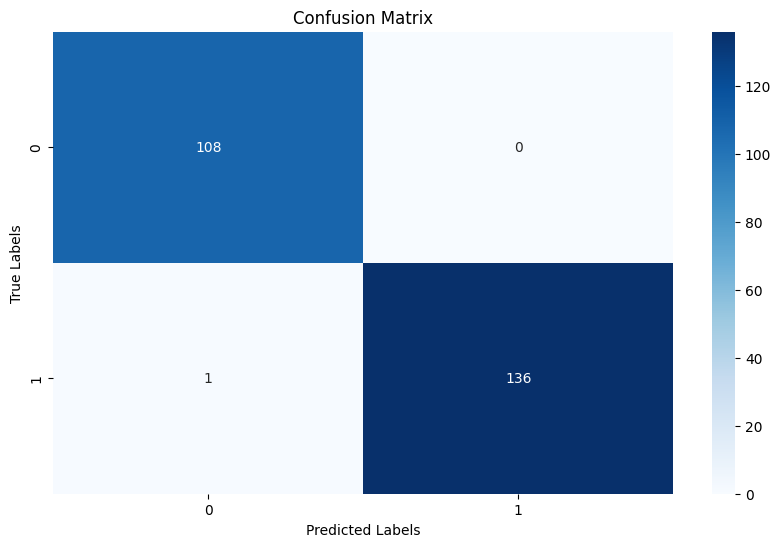

In [14]:
# Step 7: Evaluate Logistic Regression Model
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Adjust decision threshold to favor predicting 'purchased'
threshold = 0.5
y_pred_class = (y_pred_prob >= threshold).astype(int)

# Extract False Positives from the Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()
print(f"False Positives: {fp}")


print("\nClassification Report:\n", classification_report(y_test, y_pred_class, zero_division=0))

# Evaluate Model Accuracy
conf_matrix = confusion_matrix(y_test, y_pred_class)
accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / conf_matrix.sum()
print(f"Model Accuracy: {accuracy:.4f}")

# Display the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 8: Aggregate Product Preferences from Predictions
# Create DataFrame with actual and predicted values
predicted_counts = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_class})

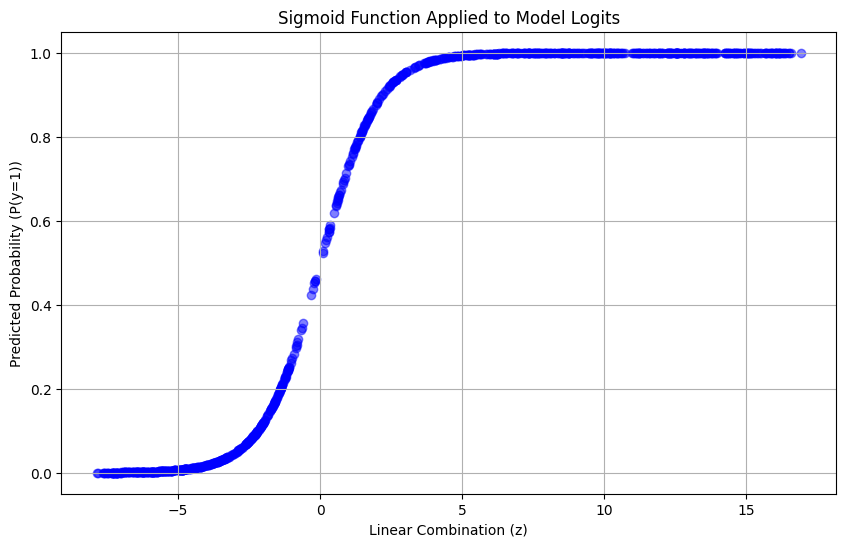

In [ ]:
# Step 9: Visualize the Sigmoid Function for Logistic Regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Extract the logits (linear combinations) from the model
z_train = X_train.dot(logreg.coef_.T) + logreg.intercept_

# Extract the logits (linear combinations) from the model
plt.figure(figsize=(10, 6))
plt.scatter(z_train, sigmoid(z_train), color='b', alpha=0.5)
plt.title('Sigmoid Function Applied to Model Logits')
plt.xlabel('Linear Combination (z)')
plt.ylabel('Predicted Probability (P(y=1))')
plt.grid(True)
plt.show()